# Lab | Chains in LangChain

## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# New Cell
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
HF_TOKEN = userdata.get('HF_TOKEN')

In [4]:
'''
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')
HUGGINGFACEHUB_API_TOKEN = os.getenv('HUGGINGFACEHUB_API_TOKEN')
'''

"\nimport os\n\nfrom dotenv import load_dotenv, find_dotenv\n_ = load_dotenv(find_dotenv())\n\nOPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')\nHUGGINGFACEHUB_API_TOKEN = os.getenv('HUGGINGFACEHUB_API_TOKEN')\n"

In [ ]:
#!pip install pandas

In [5]:
import pandas as pd
df = pd.read_csv('/content/Data.csv')

In [6]:
df.head()

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\r\n,I loved this product. But they only seem to l...


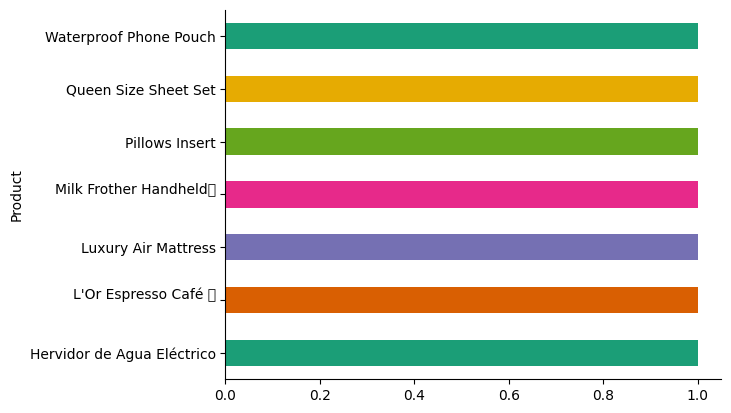

In [38]:
# @title Product

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## LLMChain

In [24]:
# New Cell.
!pip install langchain_openai
!pip install langchain

In [25]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [32]:
#Replace None by your own value and justify
llm = ChatOpenAI(temperature=0.7, api_key = OPENAI_API_KEY) # for translating pusposes no need to additional text.


In [41]:
prompt = ChatPromptTemplate.from_template( "You are experienced seller, provide the clients a detailed description of the product: {product_name}"
)

In [42]:

chain = LLMChain(llm=llm, prompt=prompt)

In [92]:
product = "Nike shoes" #Select a product type to be describe
chain.run(product)

"These Nike shoes are a must-have for any athletic enthusiast or casual wearer. With their sleek design and superior comfort, they are perfect for running, training, or everyday wear.\n\nMade with high-quality materials, these shoes are durable and built to last. The cushioned midsole provides excellent support and shock absorption, while the breathable upper allows for maximum airflow to keep your feet cool and comfortable.\n\nThe rubber outsole offers great traction on a variety of surfaces, making these shoes perfect for indoor or outdoor activities. And with the iconic Nike swoosh logo on the side, you'll be sporting a classic and stylish look wherever you go.\n\nWhether you're hitting the gym, going for a run, or just running errands, these Nike shoes are the perfect choice for both style and performance. Treat yourself to a pair today and experience the comfort and quality that only Nike can provide."

## SimpleSequentialChain

In [93]:
from langchain.chains import SimpleSequentialChain

In [94]:
llm = ChatOpenAI(temperature=0.9, api_key = OPENAI_API_KEY)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template( "You are experienced seller, provide the clients a detailed description of the product: {product_name}"

)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [95]:

# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Based on the detailed description: {detailed description}, create a marketing pitch for the product"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [96]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [85]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
The iPhone 15 Pro is the latest flagship smartphone from Apple, offering a premium user experience with top-of-the-line features and technology. 

The iPhone 15 Pro features a stunning Super Retina XDR display, providing vibrant colors and high resolution for an immersive viewing experience. The device is powered by the latest A15 Bionic chip, ensuring fast and efficient performance for all your apps and tasks. 

With a triple camera system, including wide, ultra-wide, and telephoto lenses, the iPhone 15 Pro captures stunning photos and videos in any lighting conditions. The device also supports advanced photography features such as Night mode, Deep Fusion, and Smart HDR, allowing you to take professional-quality images with ease. 

Other features of the iPhone 15 Pro include Face ID for secure authentication, 5G connectivity for fast internet speeds, and iOS 16 for a seamless user experience. The device is available in a variety of stora

'Introducing the all-new iPhone 15 Pro – the ultimate flagship smartphone from Apple! Immerse yourself in a world of stunning visuals with the Super Retina XDR display, powered by the lightning-fast A15 Bionic chip. Capture every moment in stunning detail with the triple camera system, complete with advanced photography features for professional-quality images. \n\nStay secure with Face ID, enjoy lightning-fast 5G connectivity, and experience seamless performance with iOS 16. With a range of storage options and colors to choose from, the iPhone 15 Pro is designed to suit your individual style and needs. Elevate your mobile experience with the iPhone 15 Pro – the perfect combination of cutting-edge technology and elegant design. Get yours today and experience the future of smartphones!'

**Repeat the above twice for different products**

In [91]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
The MacBook Pro is a high-performance laptop designed for professionals and power users. It features a sleek and modern design with a stunning Retina display, delivering vibrant colors and sharp details. The MacBook Pro is powered by an Intel Core processor, providing fast and efficient performance for multitasking, video editing, graphic design, and more.

The MacBook Pro comes in various sizes, including 13-inch and 16-inch models, with options for different processors, memory, and storage capacities to suit your needs. It also offers a range of connectivity options, including Thunderbolt ports, USB-C, and headphone jack.

The MacBook Pro is known for its long battery life, lasting up to 10 hours on a single charge, making it ideal for on-the-go professionals who need to work from anywhere. It also features a Touch Bar, a dynamic and interactive touchscreen display that replaces the traditional function keys, providing quick access to s

'"Experience the ultimate in performance and design with the MacBook Pro. Whether you\'re a creative professional, a power user, or someone who demands the best in technology, the MacBook Pro is the perfect choice for you.\n\nFeaturing a stunning Retina display, powerful Intel Core processor, and a range of customizable options, the MacBook Pro delivers fast and efficient performance for all your needs. With up to 10 hours of battery life, you can work from anywhere without worrying about running out of power.\n\nThe Touch Bar provides quick access to shortcuts and controls, while the sleek and lightweight design makes it easy to take your work on the go. Stay connected with Thunderbolt ports, USB-C, and a headphone jack for all your connectivity needs.\n\nDon\'t settle for less. Choose the MacBook Pro and elevate your productivity to new heights. Upgrade to the ultimate in performance and reliability today."'

In [97]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
These Nike shoes are a high-quality and stylish footwear option for anyone who values both performance and style. They are constructed with durable materials that provide long-lasting support and comfort. The cushioned insoles offer excellent shock absorption, making them ideal for athletic activities or everyday wear.

The shoes feature a sleek design with the iconic Nike swoosh logo, giving them a classic and timeless look. The rubber outsole provides excellent grip and traction on various surfaces, ensuring stability and safety while you're on the move.

These Nike shoes are versatile and can be worn for a variety of activities, including running, walking, or casual outings. They are also available in a range of sizes and colors, so you can find the perfect pair to suit your individual style and preferences.

Overall, these Nike shoes are a reliable and stylish choice for anyone looking for a high-quality footwear option that combines 

"Introducing the ultimate combination of style and performance - Nike shoes! Crafted with the highest quality materials and designed for both durability and comfort, these shoes are perfect for all your athletic needs. Whether you're hitting the gym, going for a run, or simply taking a stroll around town, these shoes have got you covered.\n\nWith a sleek and timeless design featuring the iconic Nike swoosh logo, these shoes will elevate your style game while providing the support and stability you need. The cushioned insoles offer unbeatable shock absorption, ensuring a comfortable experience all day long.\n\nAvailable in a variety of sizes and colors, you can find the perfect pair to match your individual style. Plus, with the rubber outsole providing superior grip and traction, you can move with confidence on any surface.\n\nDon't compromise on style or performance - choose Nike shoes for the best of both worlds. Upgrade your footwear game today and experience the difference for your

## SequentialChain

In [98]:
from langchain.chains import SequentialChain

In [149]:
llm = ChatOpenAI(temperature=0.9, api_key = OPENAI_API_KEY)


first_prompt = ChatPromptTemplate.from_template(
  "Translate the {review} into Dutch"
)

chain_one = LLMChain(llm=llm, prompt=first_prompt,
                     output_key="translate_review" #Give a name to your output
                    )


In [150]:
second_prompt = ChatPromptTemplate.from_template(
    "summarise the translated review into 2 sentences."
)

chain_two = LLMChain(llm=llm, prompt=second_prompt,
                     output_key="summarised_review" #give a name to this output
                    )


In [151]:
# prompt template 3: translate to english or other language
third_prompt = ChatPromptTemplate.from_template(
    "translate the {summarised_review} into English"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="english_summary"
                      )


In [152]:

# prompt template 4: follow up message that take as inputs the two previous prompts' variables
fourth_prompt = ChatPromptTemplate.from_template(
        "Compare the {translate_review} and {english_summary} finding common themes"
)
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="result"
                     )


In [153]:
# overall_chain: input= Review
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["review"],
    output_variables=["translate_review", "summarised_review", "english_summary", "result"],
    verbose=True
)

In [154]:
review = df.Review[5]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\r\nVieux lot ou contrefaçon !?",
 'translate_review': 'Ik vind de smaak middelmatig. Het schuim blijft niet staan, het is vreemd. Ik koop dezelfde in de winkel en de smaak is veel beter... Oude partij of namaak!?',
 'summarised_review': 'The reviewer describes the hotel as very clean and modern with comfortable rooms and great amenities. They particularly enjoyed the friendly staff and convenient location near the train station.',
 'english_summary': 'El revisor describe el hotel como muy limpio y moderno, con habitaciones cómodas y excelentes comodidades. Les gustó especialmente el personal amable y la ubicación conveniente cerca de la estación de tren.',
 'result': 'Both reviews discuss the quality of a product or service. The first review is critical of a coffee product, questioning if it is an old batch or counterfeit. The second review 

**Repeat the above twice for different products or reviews**

In [161]:
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\r\nVieux lot ou contrefaçon !?",
 'translate_review': 'Ik vind de smaak matig. Het schuim blijft niet, het is vreemd. Ik koop dezelfde in de winkel en de smaak is veel beter... Oude partij of namaak!?',
 'summarised_review': 'The review praises the hotel for its clean, comfortable rooms and friendly staff. The reviewer also enjoyed the location of the hotel, which was close to many attractions and restaurants.',
 'english_summary': 'La reseña elogia al hotel por sus habitaciones limpias, cómodas y su personal amigable. El revisor también disfrutó de la ubicación del hotel, que estaba cerca de muchas atracciones y restaurantes.',
 'result': 'Both reviews discuss the quality of a product or service and express disappointment or satisfaction with the experience. The first review mentions a negative experience with a product (coffee), questionin

## Router Chain

In [142]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts,
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity.

Here is a question:
{input}"""

In [143]:
prompt_infos = [
    {
        "name": "physics",
        "description": "Good for answering questions about physics",
        "prompt_template": physics_template
    },
    {
        "name": "math",
        "description": "Good for answering math questions",
        "prompt_template": math_template
    },
    {
        "name": "History",
        "description": "Good for answering history questions",
        "prompt_template": history_template
    },
    {
        "name": "computer science",
        "description": "Good for answering computer science questions",
        "prompt_template": computerscience_template
    }
]

In [144]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [145]:
llm = ChatOpenAI(temperature=0.7, api_key = OPENAI_API_KEY)

In [146]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [147]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [148]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [155]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [156]:
chain = MultiPromptChain(router_chain=router_chain,
                         destination_chains=destination_chains,
                         default_chain=default_chain, verbose=True
                        )

In [157]:
chain.run("What is black body radiation?")



> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


"Black body radiation refers to the electromagnetic radiation emitted by a perfect absorber of all incident radiation, with no reflection. This means that a black body absorbs all incoming radiation and then emits radiation at a specific spectrum of frequencies and intensities based on its temperature. This phenomenon is described by Planck's law, which states that the intensity and wavelength distribution of the radiation emitted by a black body is dependent on its temperature."

In [158]:
chain.run("what is 2 + 2")



> Entering new MultiPromptChain chain...
math: {'input': 'what is 2 + 2'}
> Finished chain.


'The answer to 2 + 2 is 4.'

In [160]:
chain.run("Why does gravity exist?")



> Entering new MultiPromptChain chain...
physics: {'input': 'Why does gravity exist?'}
> Finished chain.


"Gravity exists because of the curvature of spacetime caused by mass and energy. According to Einstein's theory of general relativity, mass and energy warp spacetime, causing objects to be attracted to each other. This is what we experience as gravity. However, the exact mechanism behind gravity is still not fully understood, and it remains one of the fundamental forces of nature that scientists are continuing to study and explore."

**Repeat the above at least once for different inputs and chains executions - Be creative!**

In [162]:
chain.run("Who is the football GOAT?")



> Entering new MultiPromptChain chain...
None: {'input': 'Who is the football GOAT?'}
> Finished chain.


'The title of GOAT (Greatest of All Time) in football is a highly debated topic and is subjective to personal opinions. Some of the most commonly mentioned players in the conversation include Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pelé, and Johan Cruyff. Ultimately, it is up to individual preferences and criteria for determining the greatest football player of all time.'

In [163]:
chain.run("Does god exist??")



> Entering new MultiPromptChain chain...
None: {'input': 'Does god exist??'}
> Finished chain.


'The existence of God is a highly debated and personal belief. Some people believe in the existence of a higher power or deity, while others do not. Ultimately, whether or not God exists is a question that individuals must explore and come to their own conclusions about.'

In [164]:
chain.run("What year did Obama won USA election?")



> Entering new MultiPromptChain chain...
History: {'input': 'What year did Obama win the USA election?'}
> Finished chain.


'Barack Obama won the United States presidential election in 2008 and again in 2012.'